<a href="https://colab.research.google.com/github/leonardo0231/Special-topics/blob/main/diabetesModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle --quiet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jalilahmadafshar","key":"740cf1508dcb795db03b2d4ae80f16f6"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mathchi/diabetes-data-set
!unzip diabetes-data-set.zip

Dataset URL: https://www.kaggle.com/datasets/mathchi/diabetes-data-set
License(s): CC0-1.0
diabetes-data-set.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  diabetes-data-set.zip
replace diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
data = pd.read_csv('/content/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Preprocessing
print(data.isnull().sum())

X = data.drop('Outcome', axis=1)
y = data['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Decision Tree
params_dt = {'max_depth': [2, 4, 6, 8, 10]}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), params_dt, cv=5)
grid_dt.fit(X_train, y_train)

y_pred_dt = grid_dt.best_estimator_.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print("Decision Tree:")
print("Accuracy:", acc_dt)
print("Precision:", prec_dt)
print("Recall:", rec_dt)
print("Confusion Matrix:\n", cm_dt)
print("Best Params:", grid_dt.best_params_)
print("------------------------------------------------------------")

Decision Tree:
Accuracy: 0.7727272727272727
Precision: 0.7272727272727273
Recall: 0.5818181818181818
Confusion Matrix:
 [[87 12]
 [23 32]]
Best Params: {'max_depth': 2}
------------------------------------------------------------


In [ ]:
# Random Forest
params_rf = {'n_estimators': [50, 100, 200], 'max_depth': [4, 6, 8]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), params_rf, cv=5)
grid_rf.fit(X_train, y_train)

y_pred_rf = grid_rf.best_estimator_.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest:")
print("Accuracy:", acc_rf)
print("Precision:", prec_rf)
print("Recall:", rec_rf)
print("Confusion Matrix:\n", cm_rf)
print("Best Params:", grid_rf.best_params_)
print("------------------------------------------------------------")

Random Forest:
Accuracy: 0.7467532467532467
Precision: 0.6481481481481481
Recall: 0.6363636363636364
Confusion Matrix:
 [[80 19]
 [20 35]]
Best Params: {'max_depth': 8, 'n_estimators': 100}
------------------------------------------------------------


In [ ]:
# KNN
params_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), params_knn, cv=5)
grid_knn.fit(X_train, y_train)

y_pred_knn = grid_knn.best_estimator_.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
rec_knn = recall_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print("KNN:")
print("Accuracy:", acc_knn)
print("Precision:", prec_knn)
print("Recall:", rec_knn)
print("Confusion Matrix:\n", cm_knn)
print("Best Params:", grid_knn.best_params_)
print("------------------------------------------------------------")

KNN:
Accuracy: 0.6818181818181818
Precision: 0.5625
Recall: 0.4909090909090909
Confusion Matrix:
 [[78 21]
 [28 27]]
Best Params: {'n_neighbors': 7}
------------------------------------------------------------


In [ ]:
# SVM
params_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(SVC(), params_svm, cv=5)
grid_svm.fit(X_train, y_train)

y_pred_svm = grid_svm.best_estimator_.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
rec_svm = recall_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

print("SVM:")
print("Accuracy:", acc_svm)
print("Precision:", prec_svm)
print("Recall:", rec_svm)
print("Confusion Matrix:\n", cm_svm)
print("Best Params:", grid_svm.best_params_)
print("------------------------------------------------------------")

SVM:
Accuracy: 0.7272727272727273
Precision: 0.6326530612244898
Recall: 0.5636363636363636
Confusion Matrix:
 [[81 18]
 [24 31]]
Best Params: {'C': 1, 'kernel': 'rbf'}
------------------------------------------------------------


In [ ]:
# Final comparison of results
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'KNN', 'SVM'],
    'Accuracy': [acc_dt, acc_rf, acc_knn, acc_svm],
    'Precision': [prec_dt, prec_rf, prec_knn, prec_svm],
    'Recall': [rec_dt, rec_rf, rec_knn, rec_svm]
})

print(results)

           Model  Accuracy  Precision    Recall
0  Decision Tree  0.772727   0.727273  0.581818
1  Random Forest  0.746753   0.648148  0.636364
2            KNN  0.681818   0.562500  0.490909
3            SVM  0.727273   0.632653  0.563636


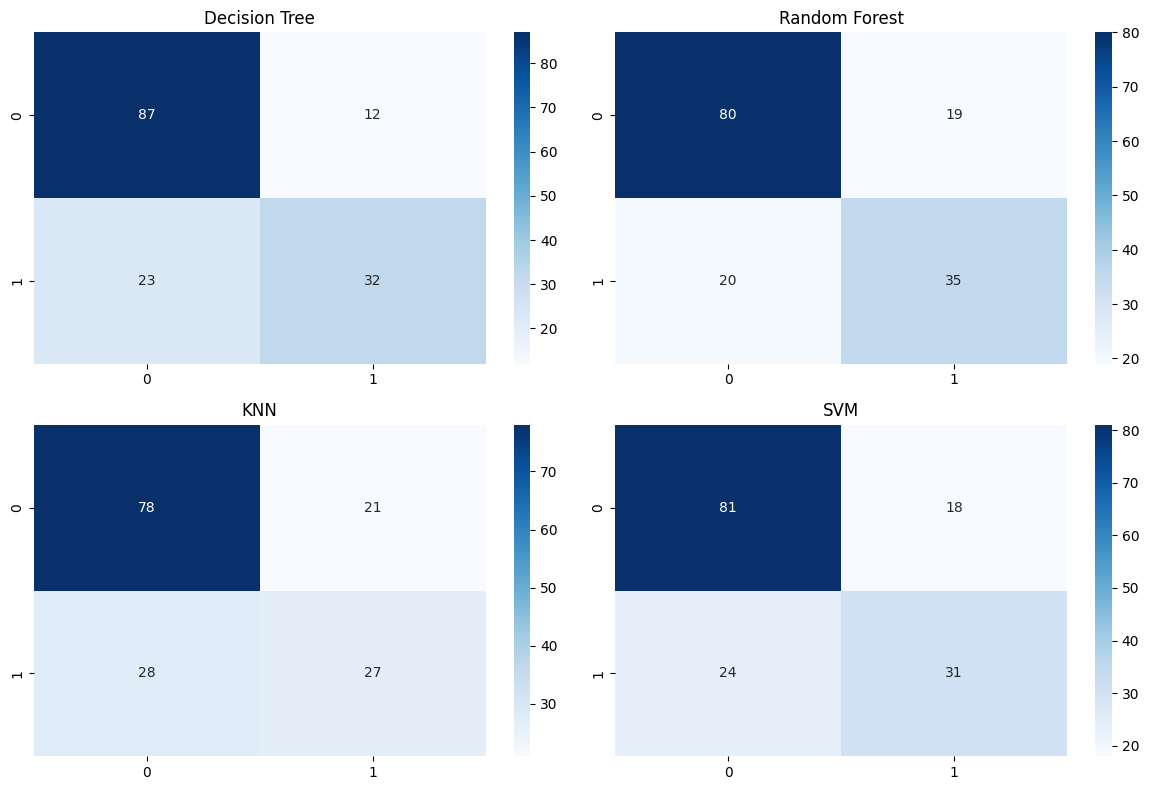

In [ ]:
# Display ambiguity matrices
plt.figure(figsize=(12,8))
for i, (name, cm) in enumerate(zip(
    ['Decision Tree', 'Random Forest', 'KNN', 'SVM'],
    [cm_dt, cm_rf, cm_knn, cm_svm]
)):
    plt.subplot(2,2,i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(name)
plt.tight_layout()
plt.show()

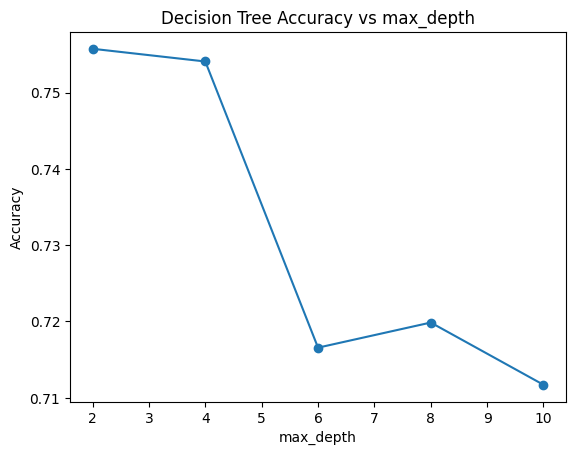

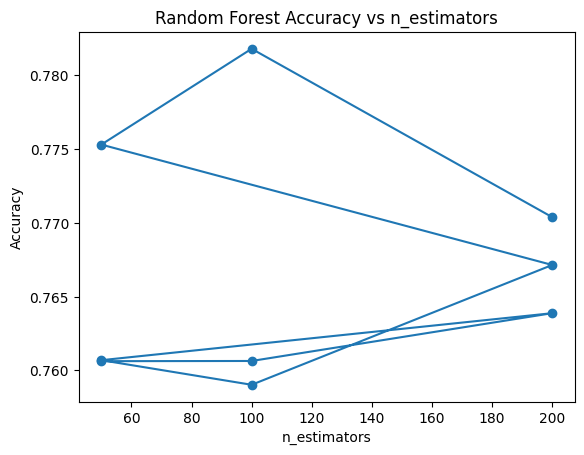

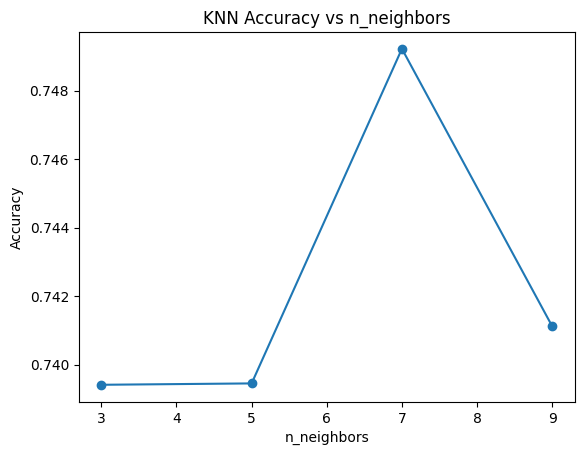

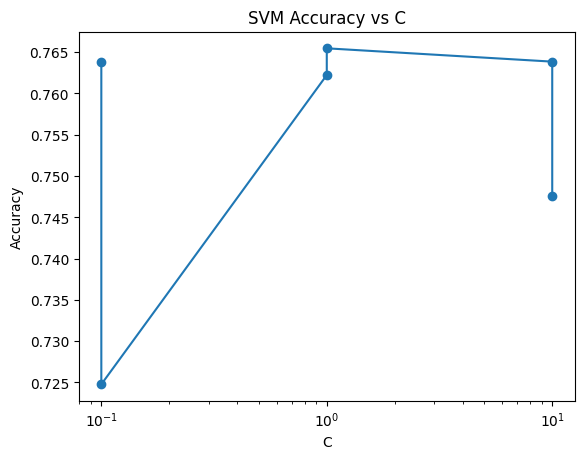

In [ ]:
# Decision Tree
scores_dt = pd.DataFrame(grid_dt.cv_results_)
plt.plot(scores_dt['param_max_depth'], scores_dt['mean_test_score'], marker='o')
plt.title('Decision Tree Accuracy vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

# Random Forest
scores_rf = pd.DataFrame(grid_rf.cv_results_)
plt.plot(scores_rf['param_n_estimators'], scores_rf['mean_test_score'], marker='o')
plt.title('Random Forest Accuracy vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

# KNN
scores_knn = pd.DataFrame(grid_knn.cv_results_)
plt.plot(scores_knn['param_n_neighbors'], scores_knn['mean_test_score'], marker='o')
plt.title('KNN Accuracy vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

# SVM
scores_svm = pd.DataFrame(grid_svm.cv_results_)
plt.plot(scores_svm['param_C'], scores_svm['mean_test_score'], marker='o')
plt.title('SVM Accuracy vs C')
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.show()